## Data visualization

The following is a summary of Chapter 4 of *Python Data Science Handbook* by Jake VanderPlas.

https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html
    
    

## Matplotlib
Matplotlib is a multi-platform data visualization library. It is imported as follows:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Plotting interactively within an IPython notebook can be done with the *%matplotlib* command, and works in a similar way to the IPython shell. In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- *%matplotlib notebook* will lead to interactive plots embedded within the notebook
- *%matplotlib inline* will lead to static images of your plot embedded in the notebook.

For the rest of the exercise, we will use *%matplotlib inline*.

In [2]:
%matplotlib inline

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the *savefig()* command. For example, to save a simple figure as a PNG file, you can run this:

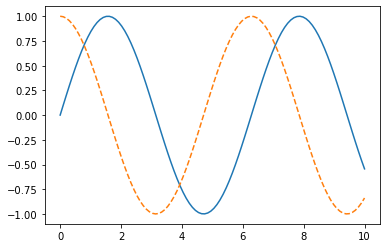

In [3]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
fig.savefig('my_figure.png')

We now have a file called *my_figure.png* in the current working directory.

Let's use the IPython *Image* object to display the contents of this file:

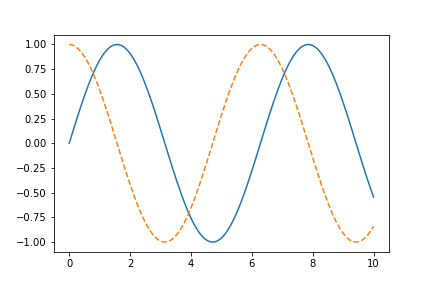

In [4]:
from IPython.display import Image
Image('my_figure.png')

The folllowing formats are supported for *fig.save_fig()* :

In [5]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

A potentially confusing feature of Matplotlib is its dual interfaces: *pyplot (plt)* interface and object-oriented interface. For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated. First, let's see an example with *plt* interface.

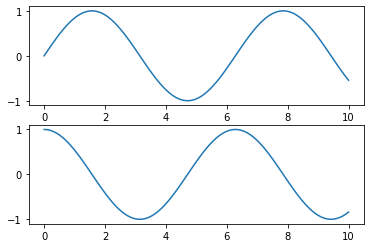

In [6]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

And here is the same plot, but using the object-oriented approach:

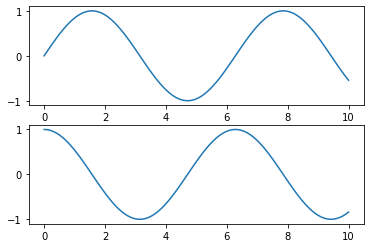

In [7]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

### MatplotLib Basics

For all Matplotlib plots, we start by creating a figure and axes. In their simplest form, a figure and axes can be created as follows:

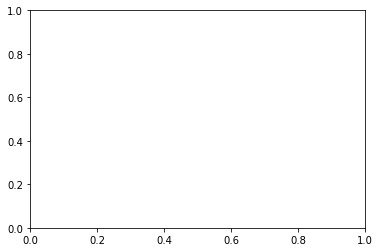

In [8]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the figure (an instance of the class *plt.Figure*) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The axes (an instance of the class *plt.Axes*) is: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. The illustration was already given in lecture 6 notebook, but here it is again:
<div>
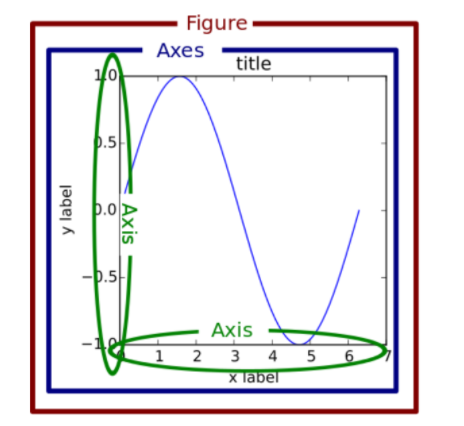
</div>



The first adjustment you might wish to make to a plot is to control the line colors and styles. The *plt.plot()* function takes additional arguments that can be used to specify these. To adjust the color, you can use the *color* keyword, which accepts a string argument representing virtually any imaginable color. The color can be specified in a variety of ways:

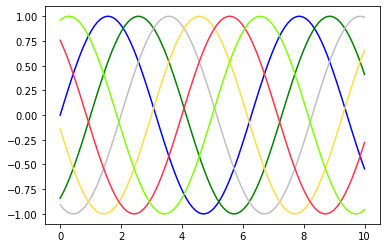

In [9]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Similarly, the line style can be adjusted using the *linestyle* keyword:

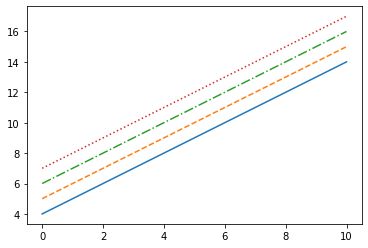

In [10]:
# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Axis limits for plotting can be set with *plt.xlim* and *plt.ylim* or jointly with *plt.axis* which allows you to set the x and y limits with a single call, by passing a list which specifies [xmin, xmax, ymin, ymax]:

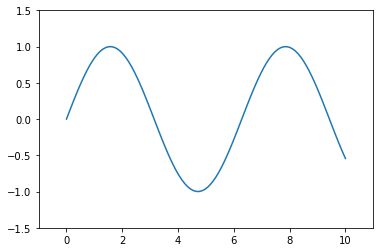

In [11]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

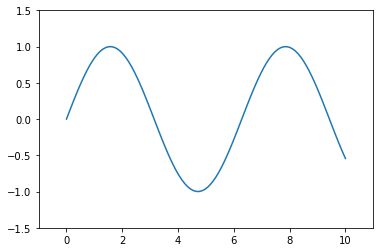

In [12]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

Labelling the axes is done with *plt.xlabel*, *plt.ylabel* and setting the title with *plt.title*.

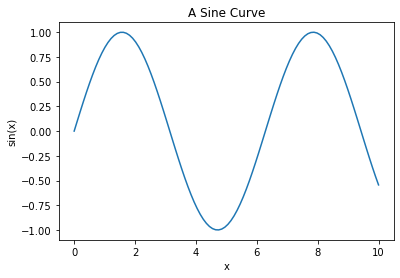

In [13]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

While most *plt* functions translate directly to *ax* methods (such as *plt.plot() → ax.plot()*, *plt.legend() → ax.legend()*, etc.), this is not the case for all the commands. In particular, functions to set limits, labels, and titles are slightly modified. For transitioning between plt-style functions and object-oriented methods, make the following changes:

- plt.xlabel() → ax.set_xlabel()
- plt.ylabel() → ax.set_ylabel()
- plt.xlim() → ax.set_xlim()
- plt.ylim() → ax.set_ylim()
- plt.title() → ax.set_title()

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the *ax.set()* method to set all these properties at once:

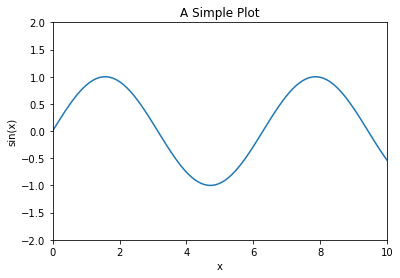

In [14]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

#### Scatter plots

In the previous examples, we used *plt.plot* and *ax.plot* to produce line plots. It turns out that this same function can produce scatter plots as well.

Recall that we can use *numpy.linspace* to return return evenly spaced numbers over a specified interval as follows:

numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)


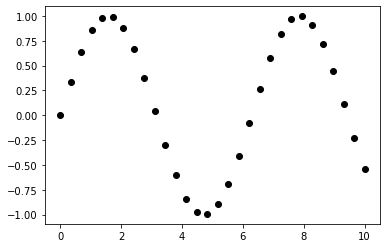

In [15]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

In the *plot* function call, the third argument is a character that represents the type of symbol used for the plotting. Here is an example of using different markers:

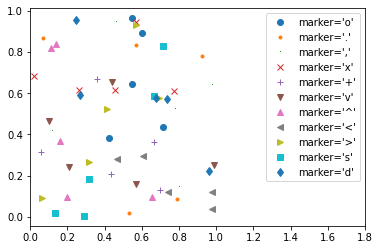

In [16]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend()
plt.xlim(0, 1.8);

A second, more powerful method of creating scatter plots is the *plt.scatter* function, which we have been using in the previous notebooks:

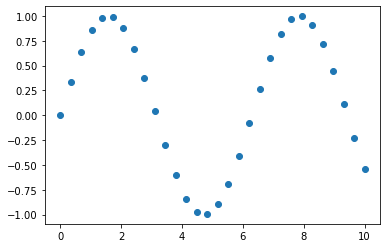

In [17]:
plt.scatter(x, y, marker='o');

The primary difference of *plt.scatter* from *plt.plot* is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

 In order to better see the overlapping results, we can also use the *alpha* keyword to adjust the transparency level.

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured.
 
 Notice that the color argument is automatically mapped to a color scale (shown here by the *colorbar()* command), and that the size argument depends on the feature 4 (petal width). You can use *iris.feature_names* to obtain a list of features of the *sklearn* dataset.



['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

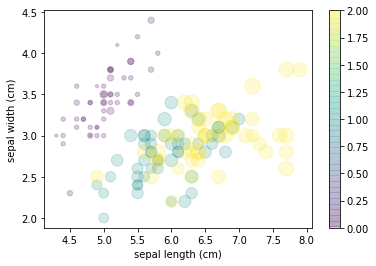

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);
plt.colorbar();  # show color scale
iris.feature_names

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data: 
- the (x, y) location of each point corresponds to the sepal length and width
- the size of the point is related to the petal width
- the color is related to the particular species of flower (target). 

Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

Note: *plt.scatter* has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In *plt.plot*, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, *plt.plot* should be preferred over *plt.scatter* for large datasets.

#### Histograms

A simple histogram can be a great first step in understanding a dataset. 

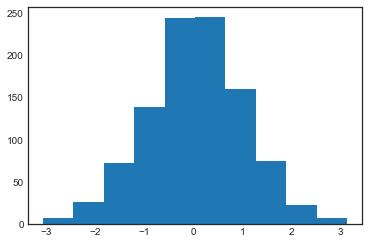

In [19]:
plt.style.use('seaborn-white')

data = np.random.randn(1000)
plt.hist(data);

The *hist()* function has many options to tune both the calculation and the display; here's an example of a more customized histogram:

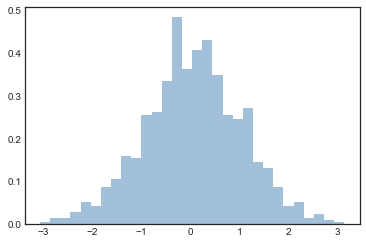

In [20]:
plt.hist(data, bins=30,  alpha=0.5, density=True,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the *np.histogram()* function is available. Recall that we have used this function in the Lecture 6 notebook.

In [21]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 33 212 489 235  31]


#### Text and annotations

Creating a good visualization involves guiding the reader so that the figure tells a story. In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary. Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this. Let's take a look at some data and how we might visualize and annotate it to help convey interesting information. 

We will use a dataset 'Effect of Holidays on US Births'. This dataset can be downloaded from:

https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

Let's now use *curl*, a tool used to transfer data from or to a server. Details on *curl* can be found on:

https://everything.curl.dev/usingcurl/downloads

To save the downloaded file with the same name as the original, we use the option: *-o*.

Any command that works at the command-line can be used in IPython by prefixing it with the ! character. 

In [22]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  258k  100  258k    0     0   662k      0 --:--:-- --:--:-- --:--:--  662k


With the command above we have successfully downloaded the file *births.csv* to the same directory where the notebook is. Let's now import that file:

In [23]:
import pandas as pd

births = pd.read_csv('births.csv')

births.head()


year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

Let's first do some data cleaning (no need to go into details, this is only for illustrating the use of text annotation). More details can be found at:
https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html#Example:-Birthrate-Data

Aftre cleaning, let's generate a plot of average births over the course of the calendar year.

<ipython-input-24-77ee6878a4d8>:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


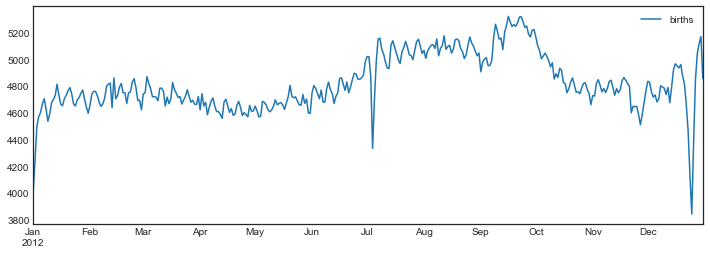

In [24]:
from datetime import datetime
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig= 0.74 * (quartiles[2] - quartiles[0])

births = births.loc[ ( ( births.births > (mu - 5 * sig)) & (births.births < (mu + 5 * sig) )  )]

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',  [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

When we're communicating data like this, it is often useful to annotate certain features of the plot to draw the reader's attention. This can be done manually with the *plt.text*/ *x.text* command, which will place text at a particular x/y value:

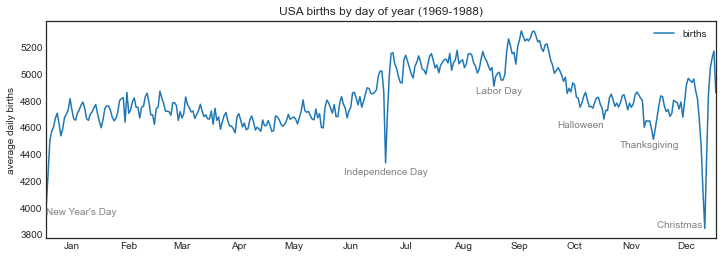

In [25]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

The *ax.text* method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text. Here we used *ha='right'* and *ha='center'*, where *ha* is short for horizonal alignment. 

In the above example we also customized the ticks. Tick properties—locations and labels—that is, can be customized by setting the *formatter* and *locator* objects of each axis. If we wish to hide ticks or labels, it can be done using *plt.NullLocator()* (no ticks) and *plt.NullFormatter()* (no labels on the ticks), as shown here:

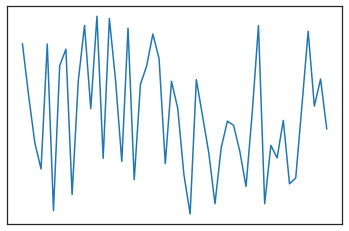

In [26]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

#### Stylesheets

The available styles are listed in *plt.style.available*. Let's see the names of the first few:

In [27]:
plt.style.available[:5]

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background']

The basic way to switch to a stylesheet is to call *plt.style.use('stylename')* but keep in mind that this will change the style for the rest of the session.

Alternatively, you can use the style context manager, which sets a style temporarily:

In [28]:
#with plt.style.context('stylename'):
#    make_a_plot()

Let's make some function that draws two plots and test it with different styles.

In [29]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

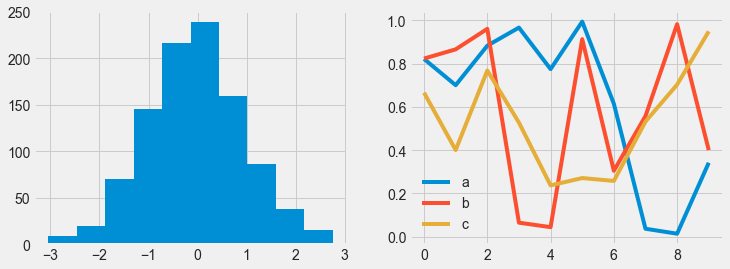

In [30]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

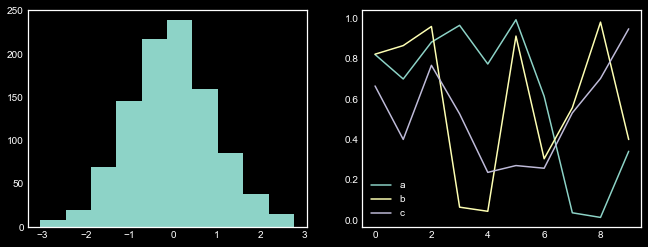

In [31]:
with plt.style.context('dark_background'):
    hist_and_lines()

## Seaborn

Seaborn is a Python data visualization library. It provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.

Let's plot a simple graph first using *matplotlib* and then *seaborn*.

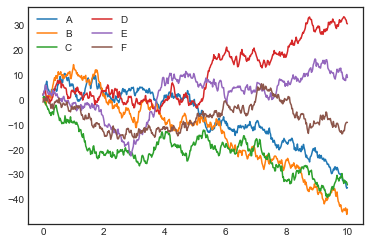

In [32]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

We can set the style by calling Seaborn's *set()* method. By convention, Seaborn is imported as sns:

In [33]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

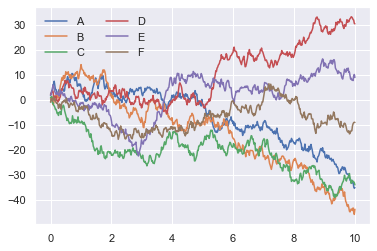

In [34]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following could be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

#### Histograms, KDE, densities

Let's revisit histograms.

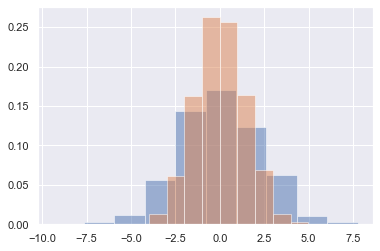

In [35]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with *sns.kdeplot*:

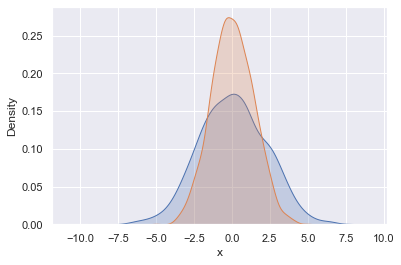

In [36]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

We can also use the function *sns.displot* to plot both the histogram and the density.

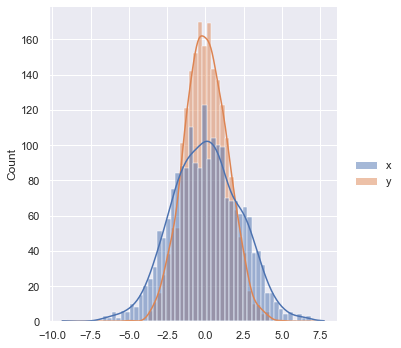

In [37]:
sns.displot(data, kde=True)

#### Pair plots
When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of numeric features against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [38]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Visualizing the multidimensional relationships among the samples is as easy as calling *sns.pairplot*:

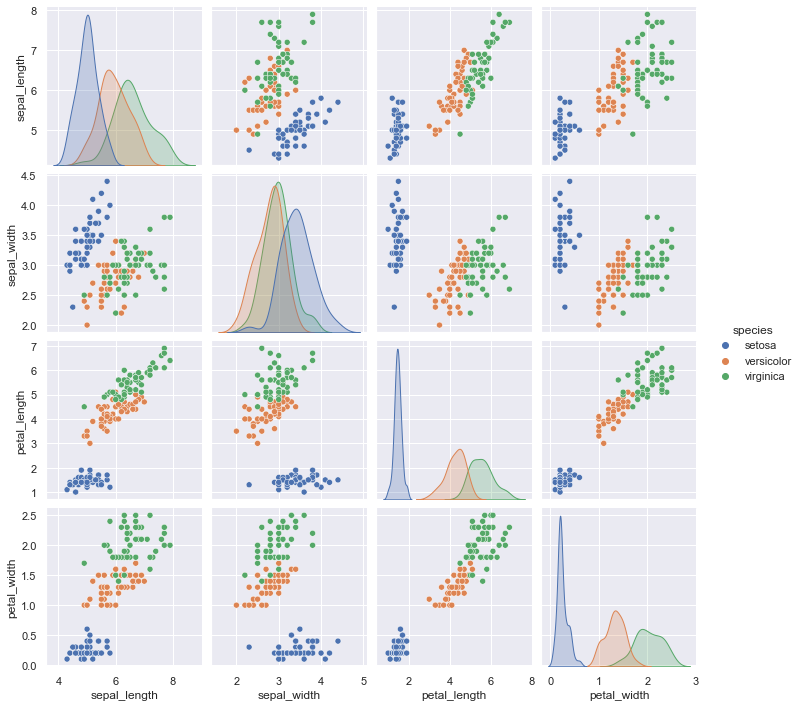

In [39]:
sns.pairplot(iris, hue='species', height=2.5)

#### Faceted histograms
Sometimes the best way to view data is via histograms of subsets. Seaborn's *FacetGrid* makes this extremely simple. We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [40]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

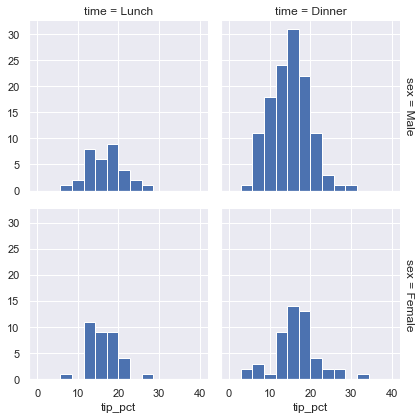

In [41]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

#### Cat plots
Cat plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

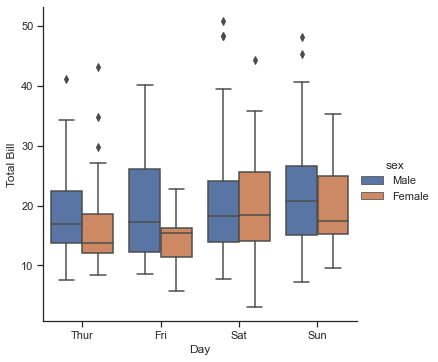

In [42]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

#### Joint distributions
We can use *sns.jointplot* to show the joint distribution between different datasets, along with the associated marginal distributions:

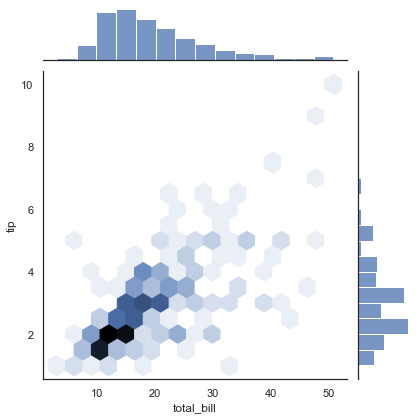

In [43]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

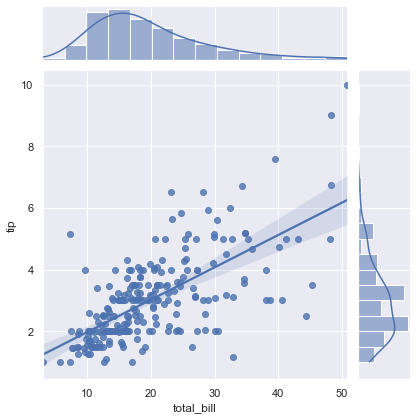

In [44]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg')

#### Violin plots
A violin plot is a hybrid of a box plot and a kernel density plot, and it shows  the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

Here is an illustration of a violin plot:

<div>
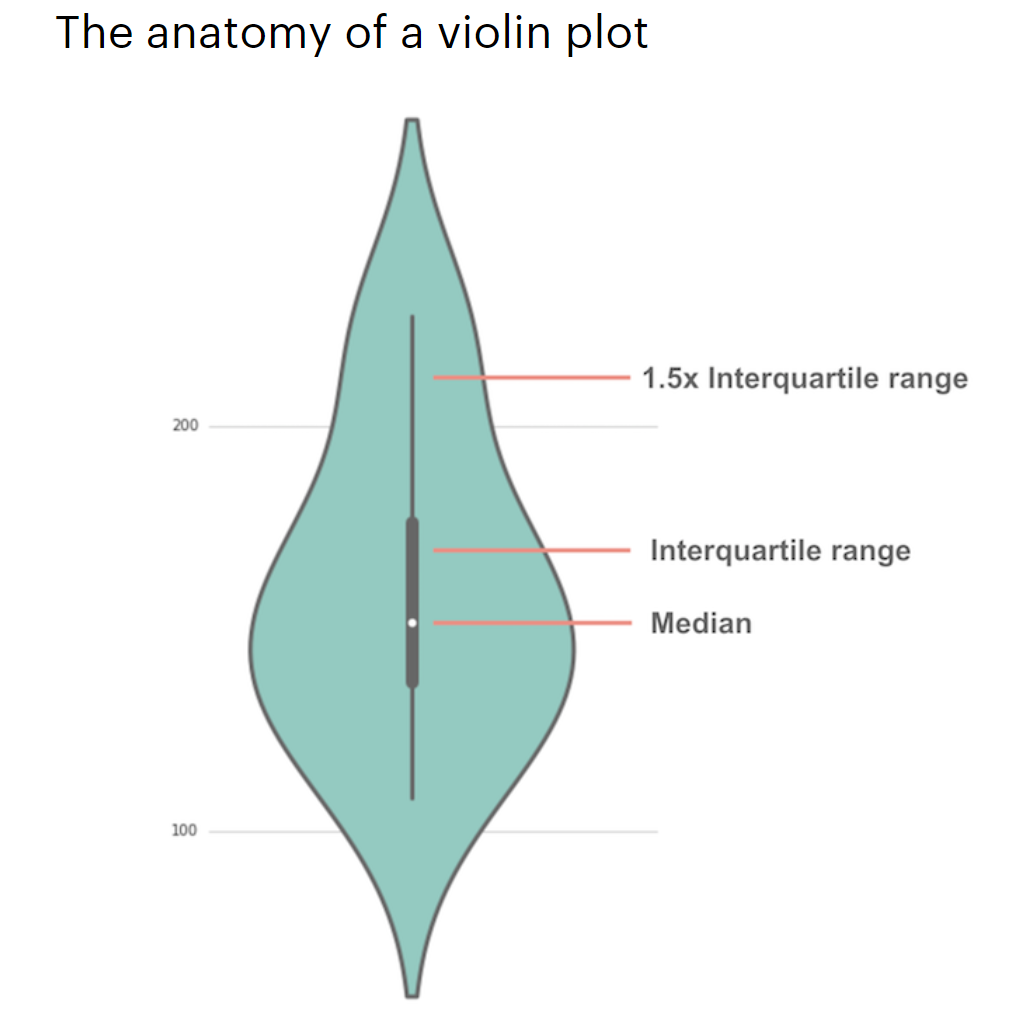
</div>



Violin plots have many of the same summary statistics as box plots:

- the white dot represents the median
- the thick gray bar in the center represents the interquartile range
- the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.

On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

Here is how we can draw a basic violin plot:

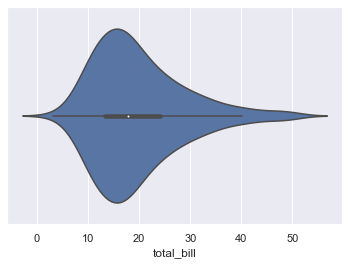

In [45]:
ax = sns.violinplot(x=tips["total_bill"])

Next we can compare the distribution of the variable *total_bill* for different values of categorical variables: through x-axis (*x='day'*) and through hue (*hue='smoker'*)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

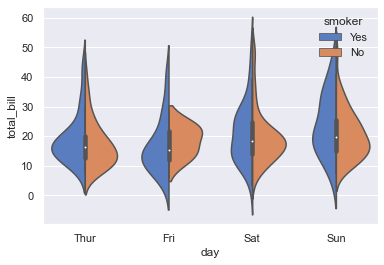

In [46]:
sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="muted", split=True)

## Example: Portuguese school dataset

Now let's apply what we have seen so far to explore and visualize a dataset that you have used for homework 1. Since in the previous notebooks we have used *matplotlib*, we will now use *seaborn*, just to gain more experience with it. (Make sure to set the correct path to the location where you have stored *students_data.csv*).

In [47]:
data = pd.read_csv("students_data.csv",sep=',')
data.head()

ID Subject school sex  age address famsize Pstatus  Medu  Fedu  ...  \
0  100097     Por     GP   F   16       U     GT3       A     3     4  ...   
1  101021     Por     GP   F   17       U     GT3       T     3     2  ...   
2  102965     Por     GP   M   16       U     LE3       T     1     2  ...   
3  102989     Por     MS   M   17       U     GT3       T     2     3  ...   
4  103131     Por     GP   F   16       U     GT3       T     1     1  ...   

  famrel freetime goout Dalc  Walc  health  absences  G1  G2  G3  
0      3        2     1    1     4       5        12  15  13  14  
1      5        3     4    1     3       3         2  17  18  17  
2      4        4     5    3     5       5         0   9   8  10  
3      4        4     3    1     1       3         4  14  15  16  
4      4        3     2    1     4       5         2  12  13  13  

[5 rows x 35 columns]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1044 non-null   int64 
 1   Subject     1044 non-null   object
 2   school      1044 non-null   object
 3   sex         1044 non-null   object
 4   age         1044 non-null   int64 
 5   address     1044 non-null   object
 6   famsize     1044 non-null   object
 7   Pstatus     1044 non-null   object
 8   Medu        1044 non-null   int64 
 9   Fedu        1044 non-null   int64 
 10  Mjob        1044 non-null   object
 11  Fjob        1044 non-null   object
 12  reason      1044 non-null   object
 13  guardian    1044 non-null   object
 14  traveltime  1044 non-null   int64 
 15  studytime   1044 non-null   int64 
 16  failures    1044 non-null   int64 
 17  schoolsup   1044 non-null   object
 18  famsup      1044 non-null   object
 19  paid        1044 non-null   object
 20  activiti

We have 1044 instances in total and 35 features.

#### Check for missing data

In [49]:
data.isnull().sum()

ID            0
Subject       0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There are no nulls.  Note that the data has already been pre-processed by the authors.

#### Check for duplicate values


In [50]:
data=data.drop_duplicates()
data.shape

(1044, 35)

There were no duplicate rows in the data. Next, let's check are there students with duplicate IDs. For our dataset, IDs should be unique per student.

In [51]:
data['ID'].nunique()

1043

We have 1044 instances, but only 1043 IDs. One is duplicated.

In [52]:
data[data.duplicated('ID', keep=False)]

ID Subject school sex  age address famsize Pstatus  Medu  Fedu  ...  \
1013  980773     Por     GP   M   16       U     LE3       T     2     2  ...   
1014  980773     Por     GP   F   17       R     GT3       T     2     2  ...   

     famrel freetime goout Dalc  Walc  health  absences  G1  G2  G3  
1013      5        4     4    2     4       5         2  10  10  10  
1014      5        3     2    1     2       3        21  13  13  13  

[2 rows x 35 columns]

The duplicate IDs appear to be different students so we will change the ID of the second one. (Decisions such as this should be based on your knowledge of the problem / business insight).

In [53]:
data.loc[data.index == 1014,'ID'] = 999999
data['ID'].nunique()

1044

#### Check distributions of features

In [54]:
print('Number of students per subject')
print(data['Subject'].value_counts())
print('Number of students per each of the two schools included in the study')
print(data['school'].value_counts())
print('Number of male and female students')
print(data['sex'].value_counts())
print('Number of students living in rural or urban settings')
print(data['address'].value_counts())
print('Number of students with family size greater than or less than 3')
print(data['famsize'].value_counts())
print('Number of students wtih parents togethor or apart')
print(data['Pstatus'].value_counts())

Number of students per subject
Por     649
Math    395
Name: Subject, dtype: int64
Number of students per each of the two schools included in the study
GP    772
MS    272
Name: school, dtype: int64
Number of male and female students
F    591
M    453
Name: sex, dtype: int64
Number of students living in rural or urban settings
U    759
R    285
Name: address, dtype: int64
Number of students with family size greater than or less than 3
GT3    738
LE3    306
Name: famsize, dtype: int64
Number of students wtih parents togethor or apart
T    923
A    121
Name: Pstatus, dtype: int64


Now let's visualize the same information we got from the value counts.
We could use the *histplot*, but let's try also *countplot*, which can be thought of as a histogram across a categorical, instead of quantitative, variable.
(Recall that  % returns the remainder of dividing, and we can use this trick to correctly index the axes of the subplots ax[row. column] in a loop).

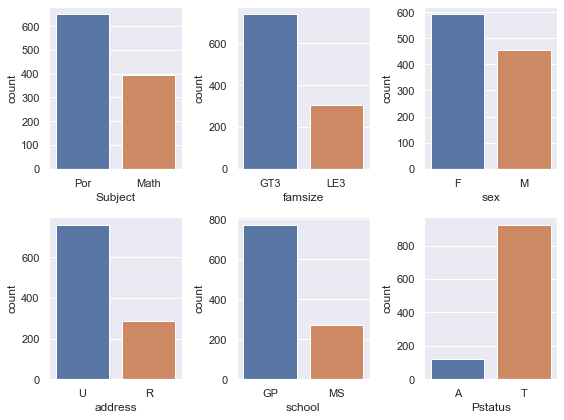

In [55]:
cols=['Subject','school','sex','address','famsize','Pstatus']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
for i, col in enumerate(cols):
    sns.countplot(data=data, x=col, ax=ax[i%2, i%3])
fig.tight_layout()

Let's now look the distribution of the grades: variables G1,G2, G3.

<AxesSubplot:>

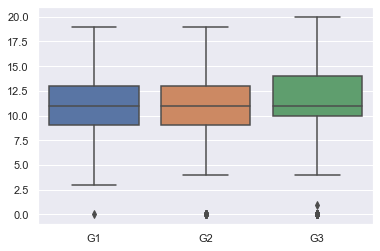

In [56]:
sns.boxplot(data=data[['G1','G2','G3']])

We can also look at the relationship between the grade G3 (final grade) and the above categorical variables.

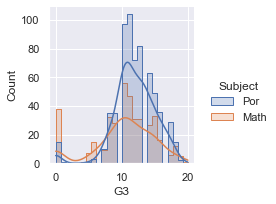

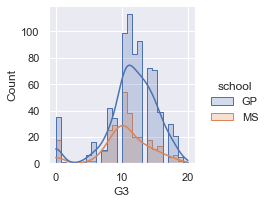

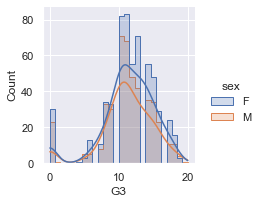

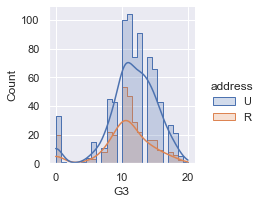

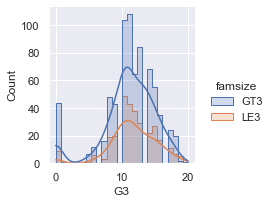

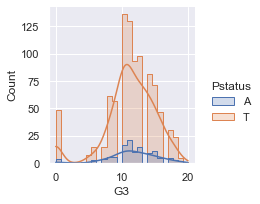

In [57]:
for  col in cols:
    sns.displot(data, x="G3", hue=col, element="step", height=3, kde=True )

Let's look at the age distribution:

<AxesSubplot:xlabel='age', ylabel='Density'>

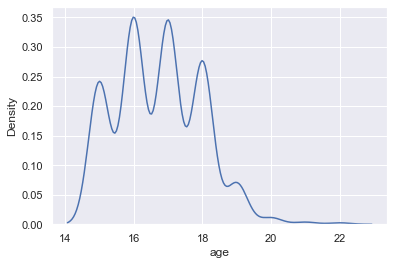

In [58]:
sns.kdeplot(data['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

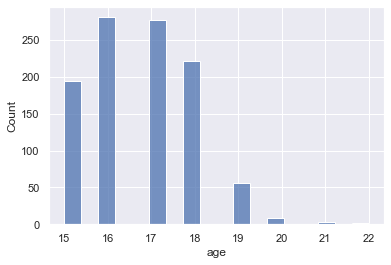

In [59]:
sns.histplot(data['age'])

There are some unusually old students. Let's look at their performance.

<AxesSubplot:>

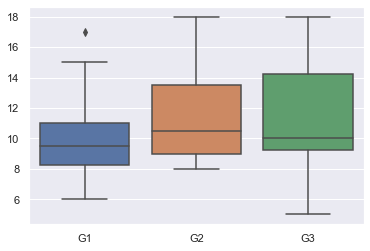

In [60]:
sns.boxplot(data=data.loc[data.age>19][['G1','G2','G3']])

In [61]:
data.loc[data.age<=19][['G1','G2','G3']].describe()

G1           G2           G3
count  1030.000000  1030.000000  1030.000000
mean     11.226214    11.244660    11.344660
std       2.981037     3.288574     3.869927
min       0.000000     0.000000     0.000000
25%       9.000000     9.000000    10.000000
50%      11.000000    11.000000    11.000000
75%      13.000000    13.000000    14.000000
max      19.000000    19.000000    20.000000

In [62]:
data.loc[data.age>19][['G1','G2','G3']].describe()

G1         G2         G3
count  14.000000  14.000000  14.000000
mean   10.285714  11.357143  11.142857
std     3.123818   3.128213   3.591810
min     6.000000   8.000000   5.000000
25%     8.250000   9.000000   9.250000
50%     9.500000  10.500000  10.000000
75%    11.000000  13.500000  14.250000
max    17.000000  18.000000  18.000000

The grades of the older students seem to be lower than of the younger, so perhaps they were held back. It seems that this is not a data entry error.

In [63]:
data[data['age']>19]

ID Subject school sex  age address famsize Pstatus  Medu  Fedu  ...  \
95   173638     Por     GP   M   21       R     LE3       T     1     1  ...   
284  342577    Math     MS   M   21       R     GT3       T     1     1  ...   
340  390717     Por     GP   M   20       U     GT3       A     3     2  ...   
369  417336    Math     MS   M   20       U     LE3       A     2     2  ...   
570  586846    Math     GP   M   22       U     GT3       T     3     1  ...   
653  658066     Por     MS   F   20       U     GT3       T     3     3  ...   
680  676866     Por     GP   M   22       U     GT3       T     3     1  ...   
742  736856     Por     MS   M   20       R     GT3       T     1     1  ...   
759  746457    Math     GP   M   20       U     GT3       A     3     2  ...   
810  800561     Por     GP   F   20       U     GT3       T     1     0  ...   
817  804253     Por     GP   F   20       R     GT3       T     2     1  ...   
842  821049     Por     GP   F   21       U     LE3       T     4     4  ...   
886  867667     Por     GP   F   20       R     GT3       T     1     1  ...   
962  935262    Math     MS   F   20       U     GT3       T     4     2  ...   

    famrel freetime goout Dalc  Walc  health  absences  G1  G2  G3  
95       5        3     3    5     2       4        21   9  10  10  
284      5        5     3    3     3       3         3  10   8   7  
340      5        5     3    1     1       5         0  14  15  15  
369      5        5     4    4     5       4        11   9   9   9  
570      5        4     5    5     5       1        16   6   8   8  
653      3        3     4    2     4       3         8  11   9  10  
680      5        4     5    5     5       1        12   7   8   5  
742      4        4     3    2     4       4        12   8  11  10  
759      5        5     3    1     1       5         0  17  18  18  
810      5        3     1    1     1       5         5   8  10  10  
817      1        2     3    1     2       2         8  10  12  12  
842      3        3     2    1     1       5         0   9  12  12  
886      3        2     2    1     3       3         8  11  15  15  
962      5        4     3    1     1       3         4  15  14  15  

[14 rows x 35 columns]

Let's look at failures  (number of past class failures (numeric: n if 1<=n<3, else 4) ).

In [64]:
data['failures'].value_counts()

0    861
1    120
2     33
3     30
Name: failures, dtype: int64

Variable absences denotes the total number of absences. Let's look at its distribution.

<AxesSubplot:>

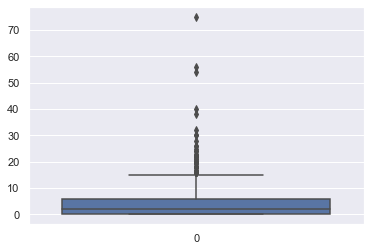

In [65]:
sns.boxplot(data=data['absences'])

Let's inspect the outlier values of absences:

In [66]:
data[data['absences']>40]

ID Subject school sex  age address famsize Pstatus  Medu  Fedu  ...  \
234  292475    Math     GP   F   16       U     GT3       T     3     3  ...   
353  396440    Math     GP   F   17       U     LE3       T     3     3  ...   
990  962706    Math     GP   F   18       R     GT3       A     3     2  ...   

    famrel freetime goout Dalc  Walc  health  absences  G1  G2  G3  
234      4        3     3    2     4       5        54  11  12  11  
353      5        3     3    2     3       1        56   9   9   8  
990      4        1     1    1     1       5        75  10   9   9  

[3 rows x 35 columns]

Next let's look at the distribution of some other variables:
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

<AxesSubplot:>

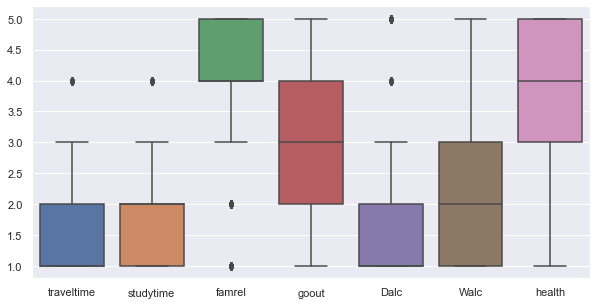

In [67]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['traveltime','studytime','famrel','goout','Dalc','Walc','health']])

- activities - extra-curricular activities (binary: true or false)
- nursery - attended nursery school (binary: true or false)
- higher - wants to take higher education (binary: true or false)
- internet - Internet access at home (binary: true or false)
- romantic - with a romantic relationship (binary: true or false)

In [68]:
print(data.activities.value_counts())
print(data.nursery.value_counts())
print(data.higher.value_counts())
print(data.internet.value_counts())
print(data.romantic.value_counts())

no     528
yes    516
Name: activities, dtype: int64
yes    835
no     209
Name: nursery, dtype: int64
yes    955
no      89
Name: higher, dtype: int64
yes    827
no     217
Name: internet, dtype: int64
no     673
yes    371
Name: romantic, dtype: int64


We could also check the distribution of G3 for different values of features such as *activities* and *romantic*:

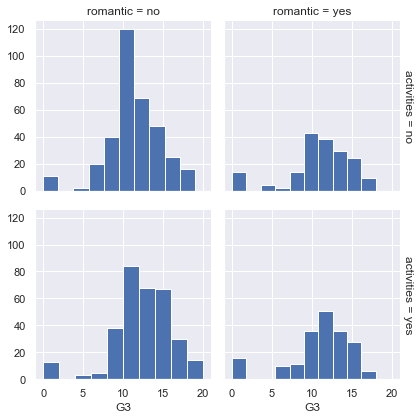

In [69]:
grid = sns.FacetGrid(data, row="activities", col="romantic", margin_titles=True)
grid.map(plt.hist, "G3");

- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')

In [70]:
print(data.famsize.value_counts())
print(data.Pstatus.value_counts())
print(data.guardian.value_counts())

GT3    738
LE3    306
Name: famsize, dtype: int64
T    923
A    121
Name: Pstatus, dtype: int64
mother    728
father    243
other      73
Name: guardian, dtype: int64


- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

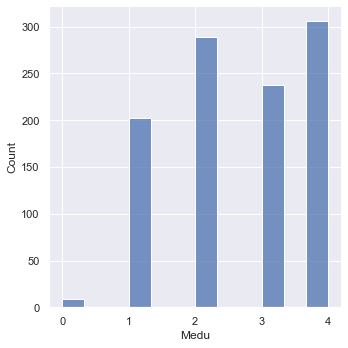

In [71]:
sns.displot(data.Medu)

<AxesSubplot:>

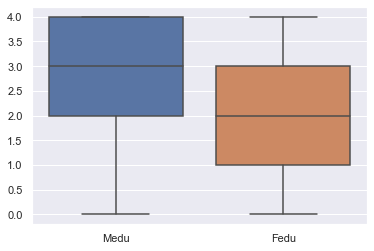

In [72]:
sns.boxplot(data=data[['Medu','Fedu']])

- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')


<AxesSubplot:xlabel='Fjob', ylabel='count'>

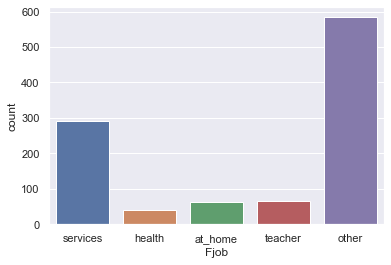

In [73]:
sns.countplot(x='Fjob',data=data,order=['services','health','at_home','teacher','other'])

<AxesSubplot:xlabel='Mjob', ylabel='count'>

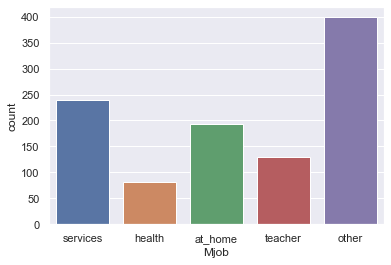

In [74]:
sns.countplot(x='Mjob',data=data,order=['services','health','at_home','teacher','other'])

Let's now look at the varibles related to the economic support:
- schoolsup - extra educational support (binary: true or false)
- famsup - family educational support (binary: true or false)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: true or false)

In [75]:
print(data.schoolsup.value_counts())
print(data.famsup.value_counts())
print(data.paid.value_counts())

no     925
yes    119
Name: schoolsup, dtype: int64
yes    640
no     404
Name: famsup, dtype: int64
no     824
yes    220
Name: paid, dtype: int64


We can look at the distribution of grade G3 for different values of features *schoolsup* and *paid*.

<AxesSubplot:xlabel='schoolsup', ylabel='G3'>

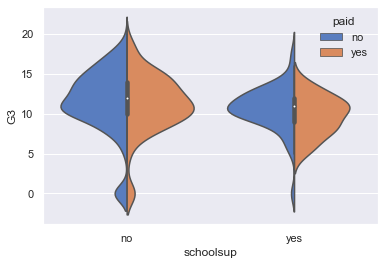

In [76]:
sns.violinplot(x="schoolsup", y="G3", hue="paid",data=data, palette="muted", split=True)

We can check for correlation between our features:

<AxesSubplot:>

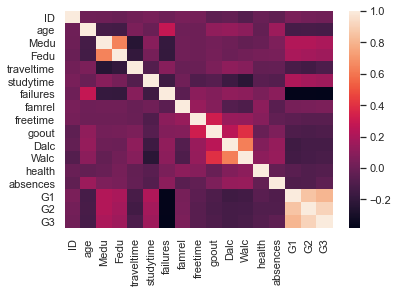

In [77]:
corr =data.corr()
sns.heatmap(corr)

#### Sanity checks

We should alsp do some basic checks. For example: are urban students more connected to the internet?

In [78]:
ct=pd.crosstab(data['address'], data['internet'], normalize='index')
ct

internet        no       yes
address                     
R         0.336842  0.663158
U         0.159420  0.840580

<AxesSubplot:xlabel='address'>

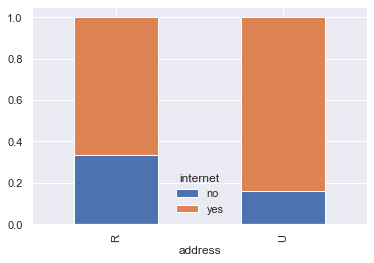

In [79]:
ct.plot.bar(stacked=True)

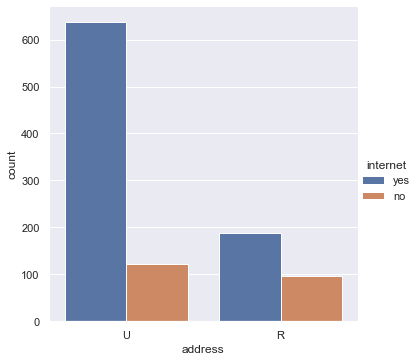

In [80]:
sns.catplot(x="address", hue="internet", kind="count", data=data)

Let's check the correlations between G1, G2, and G3:

In [81]:
corr = data[['G1','G2','G3']].corr()
corr

G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000

<AxesSubplot:>

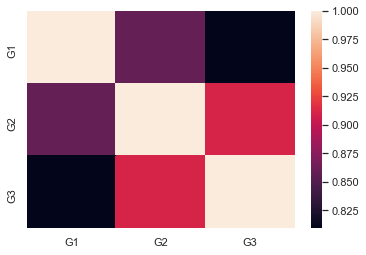

In [82]:
sns.heatmap(corr)

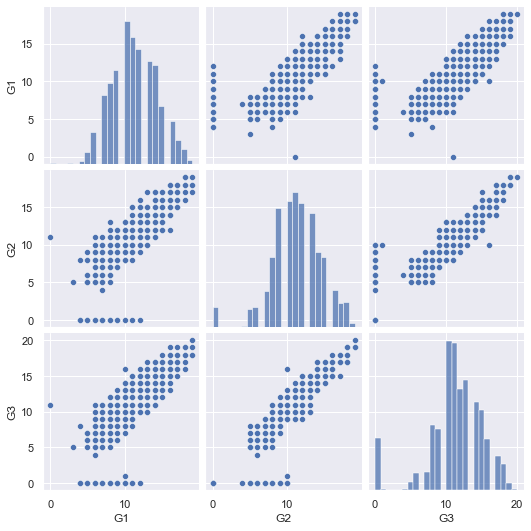

In [83]:
sns.pairplot(data[['G1','G2','G3']])